In [1]:
import yfinance as yf
import pandas as pd, numpy as np
from datetime import datetime

# get a list of tickers
filename = r'C:\Users\FranciscoPena\github\web_scraping\company_financials\data\ownership\russell3000_2024-03-12.csv'
russell3000 = pd.read_csv(filename)
russell3000['Price'] = russell3000['Price'].str.replace(',', '').astype(float)
# drop tickers with a price over $1,000
russell3000 = russell3000[(russell3000['Price'] < 1000) & (russell3000['ticker']!= '-') & (russell3000['Asset Class']=='Equity')]
failed_tickers = ['LGFB', 'PXD', 'AYX', 'FSR', 'TGH', 'LGFA', 'GEFB', 'CSTR', 'AMNB', 'CPE', 'FLT', 'METCV', 'ARD', 'EGLE', 'ADRO', 'SMMF', 'UHALB', 'DSKE', 'HEIA', 'GTXI', 'PGTI', 'BFB', 'MOGA', 'KAMN', 'BFA', 'P5N994', 'DOOR', 'CWENA', 'BRKB', 'LENB']
failed_tickers += ['SPLK', 'MDC', 'SOVO', 'AEL', 'CBAY', 'NGM', 'AGTI', 'KRTX', 'WISH']
russell3000 = russell3000[~russell3000['ticker'].isin(failed_tickers)]
tickers = list(russell3000['ticker'].unique())

In [2]:
today = datetime.today()
# start 10 years ago
start = today.replace(year=today.year-20).strftime('%Y-%m-%d')

price = yf.download(tickers, start=start, end=today.strftime('%Y-%m-%d'), interval='1mo')['Adj Close']
price.info()

[*********************100%%**********************]  2632 of 2632 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2004-07-01 to 2024-07-01
Freq: MS
Columns: 2632 entries, A to ZYXI
dtypes: float64(2632)
memory usage: 4.8 MB


In [3]:
# for each column, calculate the rolling price change over the last 3 months
price_change = price.pct_change(3) * 100

# using all columns together, calculate the descriptive statistics
all_tickers = pd.concat([price_change[c] for c in price_change.columns], axis=0, ignore_index=True)
all_tickers.describe()


count    439424.000000
mean          4.200127
std          74.679657
min         -99.411765
25%          -7.766908
50%           2.558801
75%          13.132755
max       33963.635710
dtype: float64

...

In [4]:
# what proportion of stocks have increased in price over the last 3 months
price_change_pos = price_change > 0
price_change_pos = price_change_pos.sum() / price_change_pos.count()
price_change_pos.describe()

count    2632.000000
mean        0.394344
std         0.211018
min         0.000000
25%         0.189834
50%         0.485477
75%         0.572614
max         0.738589
dtype: float64

The mean above is the proportion of price changes that are positive across all stocks and intervals.
The other statistics are indicate proportions of price changes per stock. In other words, these measures show variability due to the ticker while collapsing time.
## past year
Price changes were positive only 41% of the time. The median was 38% of intervals increased per stock. The average price change was 4.7% and the median price change was 2.0%.
## past 20 years
Price changes were positive 39.4% of the time. The median was 48.5% of intervals increased per stock. The average price change was 4.2% and the median price change was 2.6%.

Among the price increases, the average increase was 21.1% and the median was 16.3%

In [5]:
# among the positive changes, what was the average change?
price_change_pos = price_change[price_change > 0]
price_change_pos = price_change_pos.mean()
price_change_pos.describe()

count    2629.000000
mean       21.127105
std        22.744882
min         5.969266
25%        11.962966
50%        16.349601
75%        24.091462
max       747.145545
dtype: float64

## Comparison for performance: S&P 500
Given that the hedge fund strategy is active and risky, the alternative investment would be the S&P 500, which is passive and historically outperforms most money mamangers on timescales of multiple years.

In [55]:
start = datetime(today.year-20, 1, 1).strftime('%Y-%m-%d')
# get data for VOO
sp500 = yf.download('VOO', start=start, end=today.strftime('%Y-%m-%d'), interval='3mo')['Adj Close']
sp500_change = sp500.pct_change(1) * 100
sp500_change = sp500_change.reset_index().rename(columns={'Adj Close': 'VOO'})
# indicate the quarter for each row
sp500_change['quarter'] = 'q' + sp500_change['Date'].dt.quarter.astype(str) + '_' + sp500_change['Date'].dt.year.astype(str)
sp500_change

[*********************100%%**********************]  1 of 1 completed


,Date,VOO,quarter
0,2010-09-01,NaN,q3_2010
1,2010-12-01,13.183012,q4_2010
2,2011-03-01,1.744677,q1_2011
3,2011-06-01,-9.048090,q2_2011
4,2011-09-01,2.843352,q3_2011
5,2011-12-01,10.134333,q4_2011
6,2012-03-01,-3.371793,q1_2012
7,2012-06-01,7.947767,q2_2012
8,2012-09-01,1.130911,q3_2012
9,2012-12-01,7.425975,q4_2012


## Evaluate an example hedge fund for a recent quarter
Use the filing date for the 13F as the reference date, not the date that the positions were purchase

In [59]:
# load data from hedge fund
import os
# get the current working directory
directory = os.getcwd()
# get all files in the directory that end with .csv
filenames = [filename for filename in os.listdir(directory) if filename.endswith('.csv')]

ls = []
for filename in filenames:
    positions = pd.read_csv(filename)
    positions.insert(0, 'date', filename.split('_')[1].split('.')[0])
    ls.append(positions)

positions = pd.concat(ls, axis=0, ignore_index=True).rename(columns={'Sym': 'ticker', 'Cl': 'class'})
# convert all columns to lowercase
positions.columns = positions.columns.str.lower()
positions = positions.dropna(subset='ticker').sort_values(['date', 'ticker'])
# drop rows where Cl contains EXP
positions = positions[~positions['class'].str.contains('EXP', regex=True, case=False)]
positions['date'] = pd.to_datetime(positions['date'])
# the potential sell date is 13 weeks after the buy date
positions['sell_date'] = positions['date'] + pd.DateOffset(weeks=13)

# determine the change in the number of shares held by Deerfield Management over time
positions['shares'] = positions['shares'].str.replace(',', '').astype(float)
positions['change'] = positions.groupby('ticker')['shares'].diff()
# if there was no previous position, assume the change is the same as the current position
positions['change'] = positions['change'].fillna(positions['shares'])
# change must still be nan if the rows are from the earliest date
positions.loc[positions['date'] == positions['date'].min(), 'change'] = np.nan

positions.head()

,date,ticker,issuer name,class,cusip,value ($000),%,shares,principal,option type,sell_date,change
90,2022-05-16,AFIB,ACUTUS MED INC,COM,005111109,"3,681",0.1%,2648386.0,NaN,NaN,2022-08-15,NaN
3,2022-05-16,AHCO,ADAPTHEALTH CORP,COMMON STOCK,00653Q102,"186,751",4.2%,11650072.0,NaN,NaN,2022-08-15,NaN
59,2022-05-16,ALEC,ALECTOR INC,COM,014442107,"15,036",0.3%,1055192.0,NaN,NaN,2022-08-15,NaN
96,2022-05-16,AMWL,AMERICAN WELL CORP,CL A,03044L105,"1,647",0.0%,391115.0,NaN,NaN,2022-08-15,NaN
97,2022-05-16,ANNX,ANNEXON INC,COM,03589W102,"1,594",0.0%,583913.0,NaN,NaN,2022-08-15,NaN


In [60]:
# get price data for the positions that increased
buy_tickers = list(positions.query("change > 0")['ticker'].unique())
# cannot determine share changes from the earliest date. Use the next date instead
start = positions['date'].unique()[1].astype(str)[:10]
end = positions['sell_date'].max().strftime('%Y-%m-%d')
price = yf.download(buy_tickers, start=start, end=end, interval='1wk')['Adj Close']
price.info()

[*********************100%%**********************]  264 of 264 completed


13 Failed downloads:
['OT10.SG', 'SIEN', 'RYZB', 'BLU.TO', 'ORCC', 'THRX', 'RAIN']: Exception('%ticker%: No timezone found, symbol may be delisted')
['NVTA', 'IMGN', 'ICPT', 'ISEE', 'PNT', 'SLGC']: Exception('%ticker%: No data found, symbol may be delisted')



<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 2022-08-15 00:00:00 to 2024-05-13 00:00:00
Columns: 264 entries, ABEO to ZD
dtypes: float64(264)
memory usage: 190.5+ KB


In [61]:
# at least 90 days holding period implies 13 weeks
n_weeks = 13
price_change = price.pct_change(n_weeks) * 100

# melt the price data to make it easier to merge with the positions data
price_change = price_change.reset_index().melt(id_vars='Date', var_name='ticker', value_name='price_change').rename(columns={'Date': 'sell_date'})
price_change['sell_date'] = pd.to_datetime(price_change['sell_date'])
price_change.sort_values(['sell_date', 'ticker'], inplace=True)

positions = pd.merge_asof(positions, price_change, on='sell_date', by='ticker', direction='nearest')

# indicate the quarter for each row
positions['quarter'] = 'q' + positions['date'].dt.quarter.astype(str) + '_' + positions['date'].dt.year.astype(str)
# calculate the weight of each position as a proportion of the total value per quarter
positions['value'] = positions['value ($000)'].str.replace(',', '').astype(float) * 1000
positions['weight'] = positions.groupby('quarter')['value'].transform(lambda x: x / x.sum())

# calculate performance as the weighted sum of the returns
positions['performance'] = positions['price_change'] * positions['weight']

In [74]:
# get data for VOO
sp500 = yf.download('VOO', start=start, end=today.strftime('%Y-%m-%d'), interval='1wk')['Adj Close']
sp500_change = sp500.pct_change(n_weeks) * 100
sp500_change = sp500_change.reset_index().rename(columns={'Adj Close': 'VOO', 'Date': 'sell_date'})

[*********************100%%**********************]  1 of 1 completed


In [78]:
# compare the performance of Deerfield Management to the S&P 500
performance = positions.groupby(['quarter','sell_date'])['performance'].sum().reset_index().sort_values('sell_date').reset_index(drop=True)
performance.loc[0, 'performance'] = np.nan
comparison = pd.merge_asof(performance, 
                      sp500_change, on='sell_date', direction='nearest').rename(columns={'performance': 'Deerfield Management'})
comparison['outperformance'] = comparison['Deerfield Management'] - comparison['VOO']
comparison = comparison.round(2).sort_values(by='sell_date')

print(f"number of quarters: {performance.performance.count()}")
print(f"number of quarters where Deerfield Management outperformed the S&P 500: {sum(comparison['outperformance'] > 0)}")
comparison

number of quarters: 7
number of quarters where Deerfield Management outperformed the S&P 500: 4


,quarter,sell_date,Deerfield Management,VOO,outperformance
0,q2_2022,2022-08-15,NaN,NaN,NaN
1,q3_2022,2022-11-14,7.67,-5.80,13.47
2,q4_2022,2023-02-13,7.18,3.30,3.88
3,q1_2023,2023-05-16,-7.12,3.19,-10.31
4,q2_2023,2023-08-14,0.77,4.71,-3.94
5,q3_2023,2023-11-13,4.93,3.69,1.24
6,q4_2023,2024-02-13,36.66,11.25,25.41
7,q1_2024,2024-05-15,-3.71,6.37,-10.07


In [79]:
# calculate growth of $1,000 invested in Deerfield Management and the S&P 500
principal = 1000
# top row will be the initial investment
growth = comparison[['sell_date', 'Deerfield Management', 'VOO']].fillna(0) 
growth['Deerfield Management'] = growth['Deerfield Management'].div(100) + 1
growth['VOO'] = growth['VOO'].div(100) + 1
growth['Deerfield Management'] = growth['Deerfield Management'].cumprod() * principal
growth['VOO'] = growth['VOO'].cumprod() * principal
growth = growth.round(2)
growth

,sell_date,Deerfield Management,VOO
0,2022-08-15,1000.00,1000.00
1,2022-11-14,1076.70,942.00
2,2023-02-13,1154.01,973.09
3,2023-05-16,1071.84,1004.13
4,2023-08-14,1080.09,1051.42
5,2023-11-13,1133.34,1090.22
6,2024-02-13,1548.83,1212.87
7,2024-05-15,1491.37,1290.13


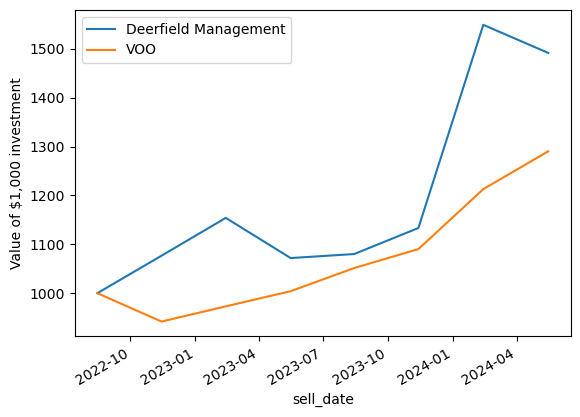

In [81]:
import matplotlib.pyplot as plt
growth.plot(x='sell_date', y=['Deerfield Management', 'VOO'])
plt.ylabel('Value of $1,000 investment')
plt.show()

## Additional analysis
The average price change is 9.0% and the median change is 5.3%, which are both higher than the general market by a factor of 2. However, the proportion of stocks with price increases is 37.5% which is lower than the general market. 

In [48]:
positions.price_change.describe()

count    224.000000
mean       9.008356
std       36.703741
min      -84.561403
25%       -9.212265
50%        5.340483
75%       16.743077
max      221.206737
Name: price_change, dtype: float64

In [57]:
# what proportion of stocks have increased in price
price_change_pos = positions.price_change > 0
price_change_pos.mean()

0.3746397694524496